# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

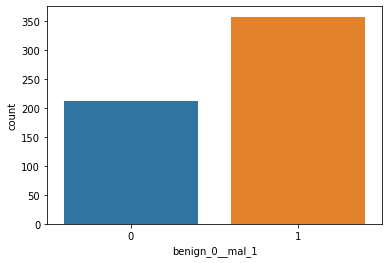

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

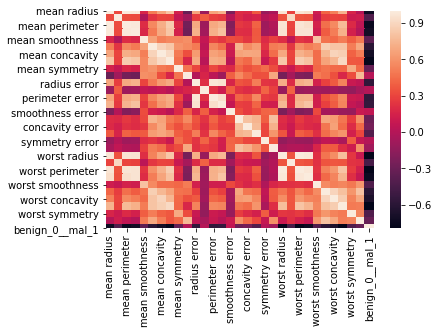

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

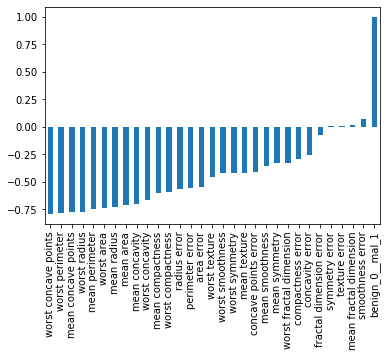

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

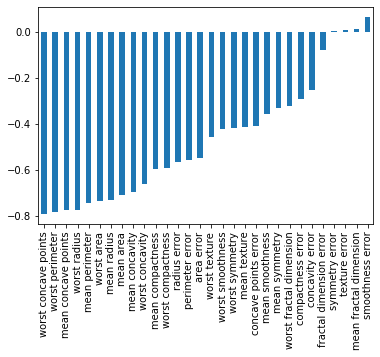

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [21]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6777 - val_loss: 0.6554
Epoch 2/600
426/426 [==============================] - 0s 55us/sample - loss: 0.6387 - val_loss: 0.6214
Epoch 3/600
426/426 [==============================] - 0s 54us/sample - loss: 0.6038 - val_loss: 0.5844
Epoch 4/600
426/426 [==============================] - 0s 52us/sample - loss: 0.5640 - val_loss: 0.5392
Epoch 5/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5153 - val_loss: 0.4848
Epoch 6/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4596 - val_loss: 0.4275
Epoch 7/600
426/426 [==============================] - 0s 52us/sample - loss: 0.4045 - val_loss: 0.3721
Epoch 8/600
426/426 [==============================] - 0s 56us/sample - loss: 0.3555 - val_loss: 0.3253
Epoch 9/600
426/426 [==============================] - 0s 54us/sample - loss: 0.3150 - val_loss: 0.2887
Epoch 10/600
426/42

Epoch 78/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0558 - val_loss: 0.1256
Epoch 79/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0529 - val_loss: 0.1244
Epoch 80/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0527 - val_loss: 0.1248
Epoch 81/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0525 - val_loss: 0.1241
Epoch 82/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0550 - val_loss: 0.1240
Epoch 83/600
426/426 [==============================] - ETA: 0s - loss: 0.080 - 0s 37us/sample - loss: 0.0507 - val_loss: 0.1251
Epoch 84/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0529 - val_loss: 0.1277
Epoch 85/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0509 - val_loss: 0.1254
Epoch 86/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0501 - val_loss: 0.1276
Epoch 87/600
426/426 [=========

426/426 [==============================] - 0s 73us/sample - loss: 0.0454 - val_loss: 0.1296
Epoch 156/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0445 - val_loss: 0.1398
Epoch 157/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0430 - val_loss: 0.1413
Epoch 158/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0409 - val_loss: 0.1452
Epoch 159/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0430 - val_loss: 0.1464
Epoch 160/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0416 - val_loss: 0.1464
Epoch 161/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0444 - val_loss: 0.1322
Epoch 162/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0470 - val_loss: 0.1468
Epoch 163/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0472 - val_loss: 0.1433
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 40us/sample - loss: 0.0419 - val_loss: 0.1461
Epoch 233/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0347 - val_loss: 0.1569
Epoch 234/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0360 - val_loss: 0.1438
Epoch 235/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0367 - val_loss: 0.1445
Epoch 236/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0346 - val_loss: 0.1506
Epoch 237/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0350 - val_loss: 0.1524
Epoch 238/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0364 - val_loss: 0.1622
Epoch 239/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0369 - val_loss: 0.1580
Epoch 240/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0359 - val_loss: 0.1529
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 37us/sample - loss: 0.0297 - val_loss: 0.1635
Epoch 310/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0305 - val_loss: 0.1565
Epoch 311/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0306 - val_loss: 0.1688
Epoch 312/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0300 - val_loss: 0.1633
Epoch 313/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0310 - val_loss: 0.1612
Epoch 314/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0306 - val_loss: 0.1742
Epoch 315/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0352 - val_loss: 0.1554
Epoch 316/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0383 - val_loss: 0.2006
Epoch 317/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0374 - val_loss: 0.1540
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 37us/sample - loss: 0.0275 - val_loss: 0.1734
Epoch 387/600
426/426 [==============================] - 0s 40us/sample - loss: 0.0277 - val_loss: 0.1918
Epoch 388/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0270 - val_loss: 0.1837
Epoch 389/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0293 - val_loss: 0.1841
Epoch 390/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0257 - val_loss: 0.1841
Epoch 391/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0251 - val_loss: 0.1817
Epoch 392/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0248 - val_loss: 0.1867
Epoch 393/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0258 - val_loss: 0.1898
Epoch 394/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0246 - val_loss: 0.1947
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 37us/sample - loss: 0.0332 - val_loss: 0.2652
Epoch 464/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0288 - val_loss: 0.1888
Epoch 465/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0227 - val_loss: 0.1946
Epoch 466/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0201 - val_loss: 0.2045
Epoch 467/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0202 - val_loss: 0.1933
Epoch 468/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0213 - val_loss: 0.1973
Epoch 469/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0304 - val_loss: 0.2597
Epoch 470/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0240 - val_loss: 0.1803
Epoch 471/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0250 - val_loss: 0.2257
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 73us/sample - loss: 0.0161 - val_loss: 0.2274
Epoch 541/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0161 - val_loss: 0.2176
Epoch 542/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0172 - val_loss: 0.2533
Epoch 543/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0170 - val_loss: 0.2147
Epoch 544/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0158 - val_loss: 0.2340
Epoch 545/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0165 - val_loss: 0.2360
Epoch 546/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0184 - val_loss: 0.2085
Epoch 547/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0172 - val_loss: 0.2503
Epoch 548/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0162 - val_loss: 0.2196
Epoch 549/600
426/426 [==============================] - 0s 

In [22]:
# model.history.history

In [23]:
model_loss = pd.DataFrame(model.history.history)

In [24]:
# model_loss

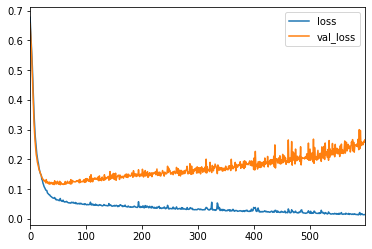

In [25]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 699us/sample - loss: 0.7019 - val_loss: 0.6940
Epoch 2/600
426/426 [==============================] - 0s 37us/sample - loss: 0.6796 - val_loss: 0.6759
Epoch 3/600
426/426 [==============================] - 0s 37us/sample - loss: 0.6588 - val_loss: 0.6540
Epoch 4/600
426/426 [==============================] - 0s 42us/sample - loss: 0.6347 - val_loss: 0.6296
Epoch 5/600
426/426 [==============================] - 0s 37us/sample - loss: 0.6059 - val_loss: 0.5978
Epoch 6/600
426/426 [==============================] - 0s 37us/sample - loss: 0.5682 - val_loss: 0.5575
Epoch 7/600
426/426 [==============================] - 0s 37us/sample - loss: 0.5192 - val_loss: 0.4967
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4597 - val_loss: 0.4380
Epoch 9/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4058 - val_loss: 0.3834
Epoch 10/600
426/

426/426 [==============================] - 0s 37us/sample - loss: 0.0565 - val_loss: 0.1204
Epoch 79/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0630 - val_loss: 0.1262
Epoch 80/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0577 - val_loss: 0.1211
Epoch 81/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0562 - val_loss: 0.1204
Epoch 82/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0542 - val_loss: 0.1209
Epoch 83/600
426/426 [==============================] - 0s 37us/sample - loss: 0.0537 - val_loss: 0.1220
Epoch 84/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0555 - val_loss: 0.1284
Epoch 85/600
426/426 [==============================] - 0s 38us/sample - loss: 0.0544 - val_loss: 0.1199
Epoch 86/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0530 - val_loss: 0.1285
Epoch 87/600
426/426 [==============================] - 0s 37us/samp

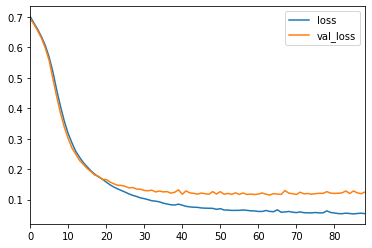

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 816us/sample - loss: 0.7380 - val_loss: 0.7008
Epoch 2/600
426/426 [==============================] - 0s 42us/sample - loss: 0.7109 - val_loss: 0.6775
Epoch 3/600
426/426 [==============================] - 0s 37us/sample - loss: 0.6796 - val_loss: 0.6604
Epoch 4/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6572 - val_loss: 0.6433
Epoch 5/600
426/426 [==============================] - 0s 37us/sample - loss: 0.6425 - val_loss: 0.6242
Epoch 6/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6176 - val_loss: 0.6040
Epoch 7/600
426/426 [==============================] - 0s 37us/sample - loss: 0.6071 - val_loss: 0.5786
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5880 - val_loss: 0.5494
Epoch 9/600
426/426 [==============================] - 0s 37us/sample - loss: 0.5768 - val_loss: 0.5144
Epoch 10/600
426/

426/426 [==============================] - 0s 73us/sample - loss: 0.1281 - val_loss: 0.1000
Epoch 79/600
426/426 [==============================] - 0s 37us/sample - loss: 0.1231 - val_loss: 0.1079
Epoch 80/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1331 - val_loss: 0.1101
Epoch 81/600
426/426 [==============================] - 0s 37us/sample - loss: 0.1246 - val_loss: 0.0959
Epoch 82/600
426/426 [==============================] - 0s 79us/sample - loss: 0.1205 - val_loss: 0.1019
Epoch 83/600
426/426 [==============================] - 0s 37us/sample - loss: 0.1406 - val_loss: 0.1004
Epoch 84/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1341 - val_loss: 0.1007
Epoch 85/600
426/426 [==============================] - 0s 37us/sample - loss: 0.1393 - val_loss: 0.0980
Epoch 86/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1173 - val_loss: 0.0951
Epoch 87/600
426/426 [==============================] - ETA: 0s - lo

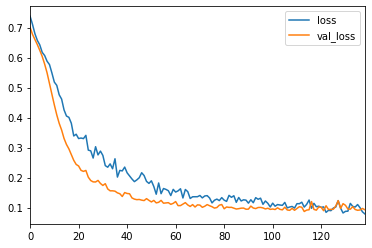

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [35]:
predictions = model.predict_classes(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [38]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
